# Happy Customer Bank的目标客户识别——特征工程
任务来源于Data Hackathon 3.x。该问题是一个金融行业的任务：预测Happy Customer Bank对客户发放贷款的概率。
问题描述：https://discuss.analyticsvidhya.com/t/hackathon-3-x-predict-customer-worth-for-happy-customer-bank/3802

该问题的优胜解决方案：
https://medium.com/data-science-analytics/analytics-vidhya-3-x-hackathon-9f2550b47be6
https://github.com/binga/AnalyticsVidhya_3.X_Hackathon


## 加载需要的库:

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 读入数据

In [3]:
#载入数据:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

/home/xumeiyu/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (12,14,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print ("Train dataset dimensions:", train.shape)
print ("Test dataset dimensions:", test.shape)

Train dataset dimensions: (87020, 27)
Test dataset dimensions: (37717, 25)


### 数据的基本情况

In [5]:
train.head(5)

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed,Unnamed: 26
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,NaN,NaN,N,Web-browser,G,S122,1,0,0,NaN
1,ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,NaN,6762.9,N,Web-browser,G,S122,3,0,0,NaN
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,NaN,NaN,N,Web-browser,B,S143,1,0,0,NaN
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,NaN,NaN,N,Web-browser,B,S143,3,0,0,NaN
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,NaN,NaN,N,Web-browser,B,S134,3,1,0,NaN


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 27 columns):
ID                       87020 non-null object
Gender                   87020 non-null object
City                     86017 non-null object
Monthly_Income           87020 non-null int64
DOB                      87020 non-null object
Lead_Creation_Date       87020 non-null object
Loan_Amount_Applied      86949 non-null float64
Loan_Tenure_Applied      86949 non-null float64
Existing_EMI             86949 non-null float64
Employer_Name            86949 non-null object
Salary_Account           75257 non-null object
Mobile_Verified          87019 non-null object
Var5                     87020 non-null object
Var1                     87020 non-null object
Loan_Amount_Submitted    52409 non-null object
Loan_Tenure_Submitted    52407 non-null float64
Interest_Rate            27729 non-null float64
Processing_Fee           27420 non-null float64
EMI_Loan_Submitted       27726 non-null 

输入特征：
ID - 唯一ID（不能用于预测）
Gender - 性别
City - 城市
Monthly_Income - 月收入（以卢比为单位）
DOB - 出生日期
Lead_Creation_Date - 潜在（贷款）创建日期
Loan_Amount_Applied - 贷款申请请求金额（印度卢比，INR）
Loan_Tenure_Applied - 贷款申请期限（单位为年）
Existing_EMI -现有贷款的EMI（EMI：电子货币机构许可证） 
Employer_Name雇主名称
Salary_Account - 薪资帐户银行
Mobile_Verified - 是否移动验证（Y / N）
VAR5 - 连续型变量
VAR1-  类别型变量
Loan_Amount_Submitted - 提交的贷款金额（在看到资格后修改和选择）
Loan_Tenure_Submitted - 提交的贷款期限（单位为年，在看到资格后修改和选择）
Interest_Rate - 提交贷款金额的利率
Processing_Fee - 提交贷款的处理费（INR）
EMI_Loan_Submitted -提交的EMI贷款金额（INR）
Filled_Form - 后期报价后是否已填写申请表格
Device_Type - 进行申请的设备（浏览器/移动设备）
Var2 - 类别型变量
Source - 类别型变量
Var4 - 类别型变量

输出：
LoggedIn - 是否login（只用于理解问题的变量 - 不能用于预测，测试集中没有）
Disbursed - 是否发放贷款（目标变量）

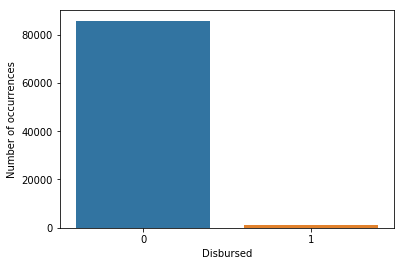

In [7]:
# Target 分布，两类样本分布严重不均衡，只有1.4%的样本Disbursed为1
sns.countplot(train['Disbursed']);
plt.xlabel('Disbursed');
plt.ylabel('Number of occurrences');

In [8]:
train.describe()

,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,LoggedIn,Disbursed,Unnamed: 26
count,8.702000e+04,8.694900e+04,86949.000000,8.694900e+04,5.240700e+04,27729.000000,27420.000000,27726.000000,87020.000000,87020.000000,12.0
mean,5.884997e+04,2.302507e+05,2.131399,3.696228e+03,9.738955e+01,19.191836,5129.135512,10997.698748,0.029867,0.014629,0.0
std,2.177511e+06,3.542068e+05,2.014193,3.981021e+04,8.725070e+03,5.840606,4724.051308,7512.114833,0.175342,0.120062,0.0
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.000000e+00,1.000000,15.250000,1176.410000,0.000000,0.000000,0.0
25%,1.650000e+04,0.000000e+00,0.000000,0.000000e+00,3.000000e+00,15.250000,2000.000000,6491.280000,0.000000,0.000000,0.0
50%,2.500000e+04,1.000000e+05,2.000000,0.000000e+00,4.000000e+00,18.000000,4000.000000,9391.385000,0.000000,0.000000,0.0
75%,4.000000e+04,3.000000e+05,4.000000,3.500000e+03,5.000000e+00,20.000000,6250.000000,12919.040000,0.000000,0.000000,0.0
max,4.445544e+08,1.000000e+07,10.000000,1.000000e+07,1.500000e+06,37.000000,50000.000000,144748.280000,5.000000,1.000000,0.0


In [9]:
#合成一个总的data，方便一起做特征工程
train['source']= 'train'
test['source'] = 'test'
data = pd.concat([train, test],ignore_index=True)
data.head()

/home/xumeiyu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,City,DOB,Device_Type,Disbursed,EMI_Loan_Submitted,Employer_Name,Existing_EMI,Filled_Form,Gender,ID,...,Processing_Fee,Salary_Account,Source,Unnamed: 24,Unnamed: 26,Var1,Var2,Var4,Var5,source
0,Delhi,23-May-78,Web-browser,0.0,NaN,CYBOSOL,0.0,N,Female,ID000002C20,...,NaN,HDFC Bank,S122,NaN,NaN,HBXX,G,1,0,train
1,Mumbai,07-Oct-85,Web-browser,0.0,6762.9,TATA CONSULTANCY SERVICES LTD (TCS),0.0,N,Male,ID000004E40,...,NaN,ICICI Bank,S122,NaN,NaN,HBXA,G,3,13,train
2,Panchkula,10-Oct-81,Web-browser,0.0,NaN,ALCHEMIST HOSPITALS LTD,0.0,N,Male,ID000007H20,...,NaN,State Bank of India,S143,NaN,NaN,HBXX,B,1,0,train
3,Saharsa,30-Nov-87,Web-browser,0.0,NaN,BIHAR GOVERNMENT,0.0,N,Male,ID000008I30,...,NaN,State Bank of India,S143,NaN,NaN,HBXX,B,3,10,train
4,Bengaluru,17-Feb-84,Web-browser,0.0,NaN,GLOBAL EDGE SOFTWARE,25000.0,N,Male,ID000009J40,...,NaN,HDFC Bank,S134,NaN,NaN,HBXX,B,3,17,train


### 检查数据质量：异常点、缺省值

In [10]:
data.apply(lambda x: sum(x.isnull()))

City                       1401
DOB                           0
Device_Type                   0
Disbursed                 37717
EMI_Loan_Submitted        84901
Employer_Name               113
Existing_EMI                111
Filled_Form                   9
Gender                        0
ID                            0
Interest_Rate             84898
Lead_Creation_Date            0
Loan_Amount_Applied         111
Loan_Amount_Submitted     49529
Loan_Tenure_Applied         111
Loan_Tenure_Submitted     49535
LoggedIn                  37717
Mobile_Verified               2
Monthly_Income                0
Processing_Fee            85346
Salary_Account            16799
Source                        0
Unnamed: 24              124732
Unnamed: 26              124725
Var1                          0
Var2                          0
Var4                          0
Var5                          0
source                        0
dtype: int64

### 类别型特征的分布

In [11]:
cat_features = ['Gender','City','Employer_Name','Salary_Account','Mobile_Verified','Var1','Filled_Form','Device_Type','Var2','Source','Var4']
for col in cat_features:
    num_vlaules = len(data[col].unique())
    print ('\n%s属性有%d的不同取值，各取值及其出现的次数\n'% (col,num_vlaules) )
    print (data[col].value_counts())


Gender属性有2的不同取值，各取值及其出现的次数

Male      71398
Female    53339
Name: Gender, dtype: int64

City属性有724的不同取值，各取值及其出现的次数

Delhi                  17936
Bengaluru              15522
Mumbai                 15425
Hyderabad              10410
Chennai                 9895
Pune                    7427
Kolkata                 4282
Ahmedabad               2528
Jaipur                  1892
Gurgaon                 1743
Coimbatore              1659
Thane                   1306
Chandigarh              1266
Surat                   1149
Visakhapatnam           1080
Indore                  1051
Vadodara                 893
Nagpur                   879
Lucknow                  813
Ghaziabad                795
Bhopal                   735
Kochi                    692
Patna                    675
Faridabad                651
Noida                    549
Madurai                  534
Gautam Buddha Nagar      485
Dehradun                 444
Raipur                   430
Bhubaneswar              407
             

3       26885
1       25673
5       21752
3        9392
1        8637
5        7333
4        7078
2        5705
2        2775
7        2664
4        2333
0        2017
0        1547
7         600
6         178
6         151
S133        6
S122        5
S159        2
S161        2
S127        1
S137        1
Name: Var4, dtype: int64


### City、Employer_Name、Salary_Account、Source
这些特征都是取值很多的特征,
取前几个重要的，其余合并成一个：others

LightGBM对类别特征建立直方图时，当特征取值数目超过max_bin(默认255)，会去掉样本数目少的类别：
统计该特征下每一种离散值出现的次数，并从高到低排序，并过滤掉出现次数较少的特征值, 
然后为每一个特征值，建立一个bin容器, 对于在bin容器内出现次数较少的特征值直接过滤掉，不建立bin容器。

In [28]:
cat_features = ['City','Employer_Name','Salary_Account', 'Source']
rare_thresholds = [100, 30, 40, 40]
j=0
for col in cat_features:
    #每个取值的样本数目
    value_counts_col =  data[col].value_counts(dropna=False)

    #样本数目小于阈值的取值为稀有取值
    rare_threshold = rare_thresholds[j]
    value_counts_rare = value_counts_col[value_counts_col < rare_threshold ].index
    
    #稀有值合并为：others
    rare_index = data[col].isin(value_counts_rare)
    
    data.loc[ data[col].isin(value_counts_rare), col] = "Others"
    
    j = j+1


Index(['Meerut', 'Thiruvananthapuram', 'Kanpur', 'Guwahati', 'Varanasi',
       'Secunderabad', 'Mysore', 'Howrah', 'North 24 Parganas', 'Hooghly',
       'Guntur'],
      dtype='object')
Index([], dtype='object')
Index([], dtype='object')
Index([], dtype='object')


### DOB
DOB是出生的具体日期，具体日期可能没作用，转换成年龄(申请贷款的年龄)

In [62]:
#创建一个年龄的字段Age
data['Age'] = pd.to_datetime(data['Lead_Creation_Date']).dt.year - pd.to_datetime(data['DOB']).dt.year
#data['Age'].head()

In [63]:
#把原始的DOB字段去掉:
data.drop(['DOB', 'Lead_Creation_Date'],axis=1,inplace=True)

### Loan Tenure 

In [15]:
#不合理的贷款年限，设为缺失值
data['Loan_Tenure_Applied'].replace([10,6,7,8,9],value = np.nan, inplace = True)
data['Loan_Tenure_Submitted'].replace(6, np.nan, inplace = True)

### LoggedIn

In [16]:
#不能用于预测特征，drop
data.drop('LoggedIn',axis=1,inplace=True)

### 类别特征先编码成数值，LightGBM无需One-hot编码

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
feats_to_encode = ['City', 'Employer_Name', 'Salary_Account','Device_Type','Filled_Form','Gender','Mobile_Verified','Source','Var1','Var2','Var4']
for col in feats_to_encode:
    data[col] = le.fit_transform(data[col])

## 最终的数据样式

In [18]:
data.head()

,City,Device_Type,Disbursed,EMI_Loan_Submitted,Employer_Name,Existing_EMI,Filled_Form,Gender,ID,Interest_Rate,...,Monthly_Income,Processing_Fee,Salary_Account,Source,Var1,Var2,Var4,Var5,source,Age
0,1416,1,0.0,NaN,305,0.0,0,0,ID000002C20,NaN,...,20000,NaN,16816,1,13,6,1,0,train,37
1,1445,1,0.0,6762.9,340,0.0,0,1,ID000004E40,13.25,...,35000,NaN,16818,1,8,6,3,13,train,30
2,1453,1,0.0,NaN,305,0.0,0,1,ID000007H20,NaN,...,22500,NaN,16838,9,13,1,1,0,train,34
3,1453,1,0.0,NaN,305,0.0,0,1,ID000008I30,NaN,...,35000,NaN,16838,9,13,1,3,10,train,28
4,1407,1,0.0,NaN,305,25000.0,0,1,ID000009J40,NaN,...,100000,NaN,16816,6,13,1,3,17,train,31


### 区分训练和测试数据

In [19]:
train = data.loc[data['source']=='train']
test = data.loc[data['source']=='test']

In [20]:
train.drop('source',axis=1,inplace=True)
test.drop(['source','Disbursed'],axis=1,inplace=True)

/Users/qing/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/qing/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
train.to_csv('FE_train.csv',index=False)
test.to_csv('FE_test.csv',index=False)